# NEP Case Study

## Problem Statement

**A survey was done, after the draft National Education Policy (NEP) 2020 was published in a country, with 577 college teachers. Each of them was asked whether they voted for the ruling party in 2019 or not and whether they are in favor of or against the NEP. Using the survey data, can we say with statistical evidence that voting preference is not independent of opinion on NEP?**

## Data Dictionary

The survey dataset contains the following columns

`college code`: Unique identification code for the college

`favours NEP`: Is the college teacher in favour of NEP (Yes/No)

`voted for ruling party`: Did the college teacher vote for the ruling party in 2019? (Yes/No)

`experience`: Years of experience of the college teacher

In [2]:
# Upgrading scipy

#!pip install --upgrade scipy

import scipy
scipy.__version__

'1.7.3'

In [3]:
# Importing libraries

# numerical and dataset modification
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# statistical
import scipy.stats as stats
import statsmodels.stats.proportion as proportion
import statsmodels.stats.multicomp as multicomp


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
# Loading dataset

data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/NEP.csv')

# Ensuring the original dataset remains unchanged
df = data_orig.copy()

# general info on dataset
print(df.info())

# peeking first 10 rows
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   college code            577 non-null    object
 1   favours NEP             577 non-null    object
 2   voted for ruling party  577 non-null    object
 3   experience              577 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.2+ KB
None


,college code,favours NEP,voted for ruling party,experience
0,C3439,Yes,Yes,10
1,C3483,No,No,9
2,C2753,Yes,Yes,9
3,C3242,Yes,Yes,3
4,C2402,No,No,5
5,C4635,Yes,Yes,1
6,C8504,Yes,Yes,3
7,C5618,Yes,Yes,6
8,C1962,No,Yes,3
9,C7694,No,Yes,7


In [6]:
# Checking for missing values

df.isnull().sum()

college code              0
favours NEP               0
voted for ruling party    0
experience                0
dtype: int64

In [8]:
# Making the name of columns easier
df.rename(columns = {'favours NEP': 'NEP', 'voted for ruling party': 'for_ruling_party'}, inplace = True)
df.head()

,college code,NEP,for_ruling_party,experience
0,C3439,Yes,Yes,10
1,C3483,No,No,9
2,C2753,Yes,Yes,9
3,C3242,Yes,Yes,3
4,C2402,No,No,5


# Studying the Dependence of Voting for NEP and the Ruling Party:

In [9]:
# Forming a smaller data frame that has the breakdown of NEP voters 

for_party = df.loc[df['for_ruling_party'] == 'Yes'].shape[0]    # no. of people for and against ruling party
anti_party = df.loc[df['for_ruling_party'] == 'No'].shape[0]

# number of those who're for/against both NEP and ruling party
for_party_and_nep = df.loc[(df['for_ruling_party'] == 'Yes') & (df['NEP'] == 'Yes')].shape[0]
anti_party_and_nep = df.loc[(df['for_ruling_party'] == 'No') & (df['NEP'] == 'No')].shape[0]

party_nep_df = pd.DataFrame({'for_ruling_party': ['Y', 'N'], 'for_NEP': [for_party_and_nep, for_party-for_party_and_nep], 
                              'anti_NEP': [anti_party-anti_party_and_nep, anti_party_and_nep]})
party_nep_df

,for_ruling_party,for_NEP,anti_NEP
0,Y,204,66
1,N,122,185


## Solution Approach: Using chi-square test of independence

### Forming Hypotheses:

$H_0$: The support for NEP and the ruling party are independent of each other.

$H_a$: The support for NEP and the ruling party are NOT independent of each other.


In [16]:
# Using Chi-square test of independence
chi, p_value, dof, expected = stats.chi2_contingency(party_nep_df.drop('for_ruling_party', axis = 1))
print('p-value =', round(p_value, 20))
print('chi =', round(chi, 2))
print('dof =', dof)
print('Expected =', expected.round(2))

if(p_value >= 0.05):
  print('The support for NEP and the ruling party are independent of each other.')
else:
  print('The support for NEP and the ruling party are NOT independent of each other.')


p-value = 9.91e-18
chi = 73.53
dof = 1
Expected = [[152.55 117.45]
 [173.45 133.55]]
The support for NEP and the ruling party are NOT independent of each other.


# Studying the Relationship between the Experience and Voting for NEP:

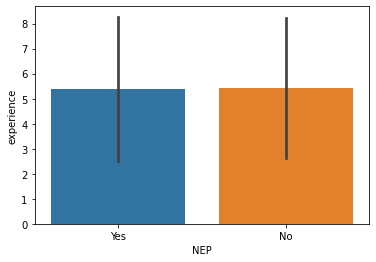

In [28]:
# Plotting the years of experience vs. status of voting for NEP

sns.barplot(data = df, x = 'NEP', y = 'experience', ci = 'sd');

## Solution Approach: Two-sample t-test


In [75]:
# Separating those voting for and against NEP in two different dataframes

df_y = df.loc[df['NEP'] == 'Yes'].reset_index(drop = True)
df_n = df.loc[df['NEP'] == 'No'].reset_index(drop = True)

In [76]:
# Peeking the subset dataframes

df_y.head(10)

,college code,NEP,for_ruling_party,experience
0,C3439,Yes,Yes,10
1,C2753,Yes,Yes,9
2,C3242,Yes,Yes,3
3,C4635,Yes,Yes,1
4,C8504,Yes,Yes,3
5,C5618,Yes,Yes,6
6,C8504,Yes,Yes,4
7,C3483,Yes,Yes,2
8,C7790,Yes,Yes,10
9,C2348,Yes,Yes,8


In [77]:
# Peeking the subset dataframes

df_n.head(10)

,college code,NEP,for_ruling_party,experience
0,C3483,No,No,9
1,C2402,No,No,5
2,C1962,No,Yes,3
3,C7694,No,Yes,7
4,C6332,No,No,1
5,C4815,No,Yes,6
6,C7694,No,Yes,6
7,C8504,No,No,4
8,C8361,No,Yes,4
9,C8955,No,No,10


In [78]:
# Checking the mean and std of years of experience for 2 groups

yes_exp_mean = df_y['experience'].mean()
no_exp_mean = df_n['experience'].mean()

yes_exp_sd = df_y['experience'].std(ddof = 1)
no_exp_sd = df_n['experience'].std(ddof = 1)

print('Average years of experience for backers of NEP:', round(yes_exp_mean, 2))
print('Average years of experience for rejectors of NEP:', round(no_exp_mean, 2))
print('SD of years of experience for backers of NEP:', round(yes_exp_sd, 2))
print('SD of years of experience for rejectors of NEP:', round(no_exp_sd, 2))

Average years of experience for backers of NEP: 5.4
Average years of experience for rejectors of NEP: 5.42
SD of years of experience for backers of NEP: 2.88
SD of years of experience for rejectors of NEP: 2.8


### Forming Hypotheses:

$H_0$: $\mu_y$ = $\mu_n$

$H_a$: $\mu_y$ $\neq$ $\mu_n$

$\mu_y$ and $\mu_n$ indicate the average years of experience for those voting for and against the NEP, respectively.

In [89]:
# Testing for the equality of variances

def my_vareq_test(x, y):
  '''This function receives two vectors and based on f-test calculations,
  ensures whether they're variances are equal or not.'''

  x = np.array(x)
  y = np.array(y)

  n_x = len(x)   # sample sizes
  n_y = len(y)

  dfn = n_x - 1  # dof of numerator and denominator
  dfd = n_y - 1

  s_x = np.std(x, ddof = 1) # sample standard deviations
  s_y = np.std(y, ddof = 1)

  test_stat = s_x**2/s_y**2  # test statistic

  if(test_stat < 1):
    test_stat = 1/test_stat
    dfn = n_y - 1 
    dfd = n_x - 1

  p_val = 2*(1 - stats.f.cdf(test_stat, dfn, dfd))
  return test_stat, p_value

# Running the test

test_stat, p_value = my_vareq_test(df_y['experience'], df_n['experience'])
print('test statistic =', round(test_stat, 3))
print('p-value =', round(p_value, 3))
if(p_value < 0.05):
  print('Variances of years of experience for backers and rejectors of NEP are NOT equal.')
else:
  print('Variances of years of experience for backers and rejectors of NEP are equal.')

test statistic = 1.055
p-value = 0.932
Variances of years of experience for backers and rejectors of NEP are equal.


In [87]:
# Using Python's method for independent t-test

test_stat, p_value = stats.ttest_ind(df_y['experience'], df_n['experience'], equal_var = True, alternative = 'two-sided')

print('test statistic =', round(test_stat, 3))
print('p-value =', round(p_value, 3))
if(p_value < 0.05):
  print('The average of years of experience for backers and rejectors of NEP are NOT equal.')
else:
  print('The average of years of experience for backers and rejectors of NEP are equal.')

test statistic = -0.085
p-value = 0.932
The average of years of experience for backers and rejectors of NEP are equal.
